In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# get the data

sms_raw = pd.read_csv('amazon_cells_labelled.csv', delimiter= '\t', header=None)
sms_raw.columns = ['message', 'review']

In [71]:
sms_raw.dtypes

message    object
review      int64
dtype: object

In [72]:
sms_raw.review = sms_raw.review.astype(str)

In [73]:
sms_raw.dtypes

message    object
review     object
dtype: object

In [74]:
sms_raw.head()

,message,review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


###### Let's add these columns to our dataframe. The words chosen below are simply intuited as possibly having something to do with spam.

In [75]:
keywords = ['click', 'offer', 'winner', 'buy', 'recommended', 'cash', 'urgent', 'quality',
            'great']

for eachword in keywords:
    # Note that we add spaces around the key so that we're getting the
    # word, not just pattern matching.
    sms_raw[str(eachword)] = sms_raw.message.str.contains(
        ' ' + str(eachword) + ' ',
        case=False
    )

In [76]:
sms_raw.head()

,message,review,click,offer,winner,buy,recommended,cash,urgent,quality,great
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False


##### Note that you could add new features to the dataframe simply by adding them to the keywords list. That's much nicer than doing each word manually. If it were more complicated it would probably be worth making a function as well.
##### Another feature option would be if the message is all uppercase. That seems kind of spammy doesn't it?

In [77]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [78]:
sms_raw.head(1).values

array([['So there is no way for me to plug it in here in the US unless I go by a converter.',
        '0', False, False, False, False, False, False, False, False,
        False, False]], dtype=object)

In [79]:
sms_raw.head()

,message,review,click,offer,winner,buy,recommended,cash,urgent,quality,great,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False


##### Before we go further, let's turn the spam column into a boolean so we can easily do some statistics to prepare for modeling

In [81]:
sms_raw['message'] = (sms_raw['message'] == 'message')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [82]:
sms_raw.head()

,message,review,click,offer,winner,buy,recommended,cash,urgent,quality,great,allcaps
0,False,0,False,False,False,False,False,False,False,False,False,False
1,False,1,False,False,False,False,False,False,False,False,False,False
2,False,1,False,False,False,False,False,False,False,False,False,False
3,False,0,False,False,False,False,False,False,False,False,False,False
4,False,1,False,False,False,False,False,False,False,False,False,False


##### one of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other. Let's check to see how true that is in this case using Pandas' built in correlation matrix function, corr(), and the heatmap from seaborn

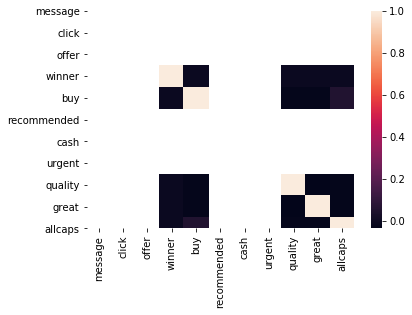

In [83]:
sns.heatmap(sms_raw.corr())

In [84]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['review']

In [86]:
target.head()

0    0
1    1
2    1
3    0
4    1
Name: review, dtype: object

In [87]:
data.head()

,click,offer,winner,buy,recommended,cash,urgent,quality,great,allcaps
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [88]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 459
